## SHAP prediction analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import lightgbm as lgb
import shap
shap.initjs()

In [3]:
# Load test matrix and booster object
test_df = pd.read_hdf('/Users/marnixkoops/Greensight/lightgbm-dataproc/local_data/test_x_8_40K_WA7_NEWCV.hdf')
booster = lgb.Booster(model_file='/Users/marnixkoops/Greensight/lightgbm-dataproc/local_data/booster_8_40K_WA7_NEWCV.txt')
features_names = ['month', 'weekday', 'dayofmonth', 'weekofyear', 'dayofyear', 'holiday_nl',
                  'holiday_be', 'lag_7', 'lag_7_min', 'lag_7_max', 'lag_7_mean', 'lag_7_median',
                  'lag_7_sum', 'lag_7_var', 'lag_8', 'lag_8_min', 'lag_8_max', 'lag_8_mean',
                  'lag_8_median', 'lag_8_sum', 'lag_8_var', 'lag_14', 'lag_14_min', 'lag_14_max',
                  'lag_14_mean', 'lag_14_median', 'lag_14_sum', 'lag_14_var', 'wa_lag_7',
                  'product_type_id', 'product_group_id', 'subproduct_type_id',
                  'actual_full_mean', 'actual_full_median', 'actual_full_var',
                  'actual_weekday_max', 'actual_weekday_median', 'actual_weekday_mean',
                  'full_mean_lag_7_median_prod', 'full_mean_lag_7_mean_prod',
                  'full_mean_lag_7_max_prod', 'weekday_mean_lag_7_median_prod',
                  'weekday_mean_lag_7_max_prod', 'full_mean_lag_7_prod',
                  'weekday_mean_lag_7_prod', 'full_mean_lag_wa_prod',
                  'weekday_mean_lag_wa_prod']

---

In [4]:
# Compute SHAP
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(test_df[features_names])

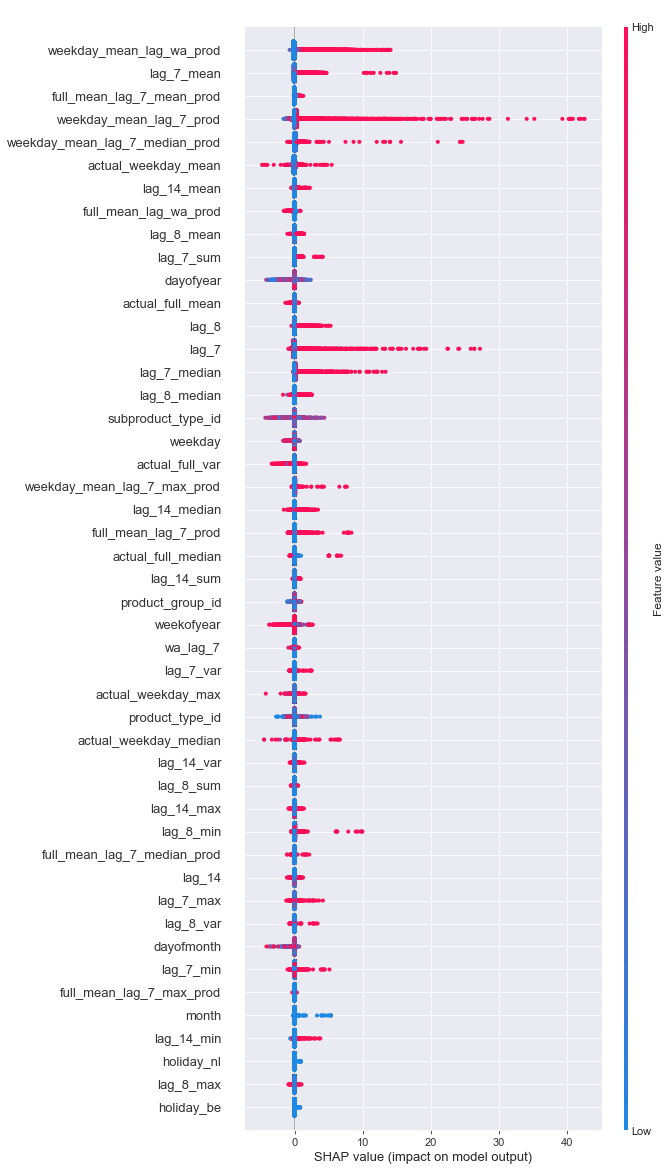

In [5]:
shap.summary_plot(shap_values, test_df[features_names], max_display=len(features_names), auto_size_plot=True)

---

In [ ]:
test_df.reset_index(drop=True, inplace=True)

**Trust Urban Primo Powerbank 4.400 mAh**

product_id = 723578

In [22]:
product_index = test_df[['product_id', 'date', 'actual']][test_df['product_id'] == 723578].index.values
product_index

array([ 10873,  17751,  50285,  70678,  95584, 105205, 150044, 156503])

In [23]:
shap.force_plot(explainer.expected_value, shap_values[product_index, :], test_df[features_names].iloc[product_index, :])

---

In [28]:
product_index = test_df[['product_id', 'date', 'actual']][test_df['product_id'] == 342872].index.values
product_index

array([ 17924,  47424,  78262,  97739, 113139, 130645, 157090])

In [29]:
shap.force_plot(explainer.expected_value, shap_values[product_index, :], test_df[features_names].iloc[product_index, :])

---

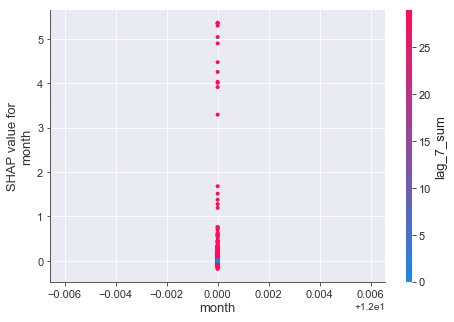

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


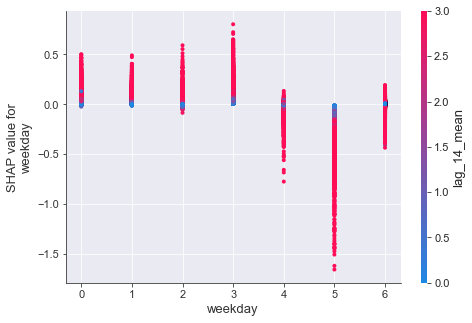

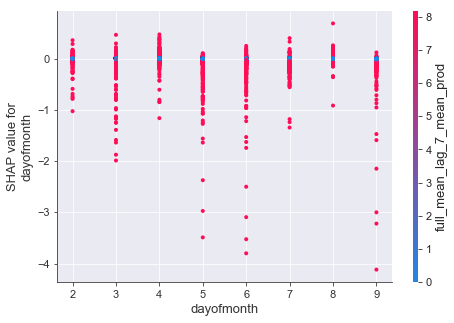

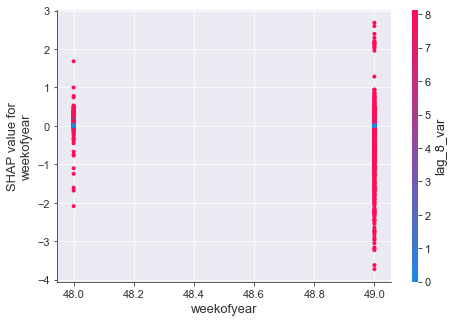

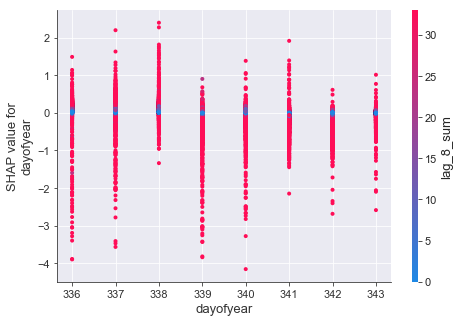

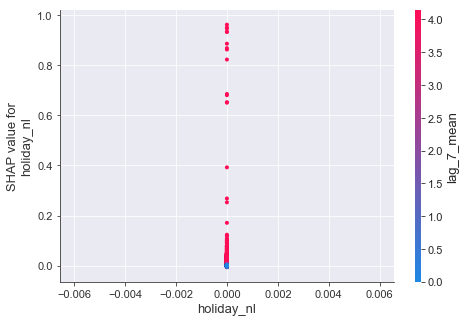

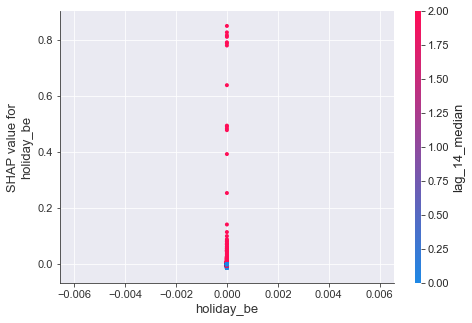

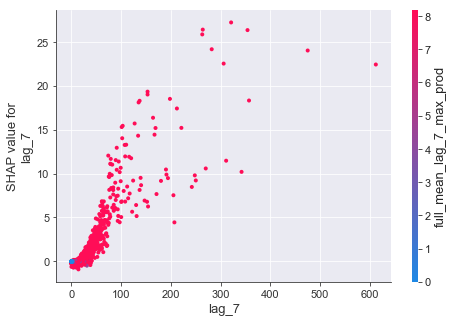

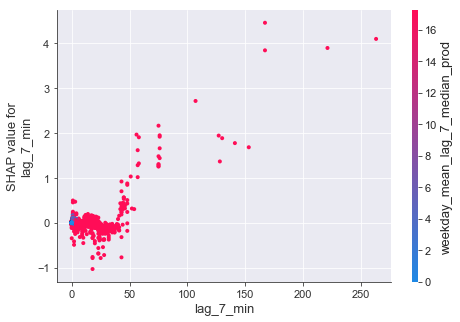

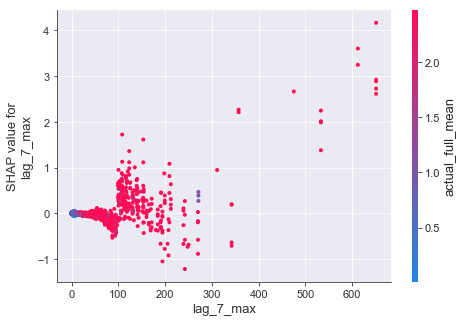

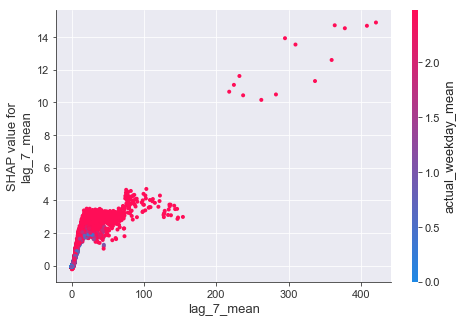

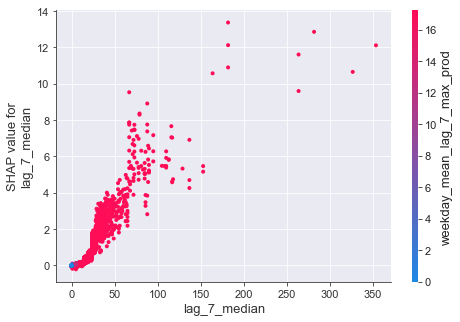

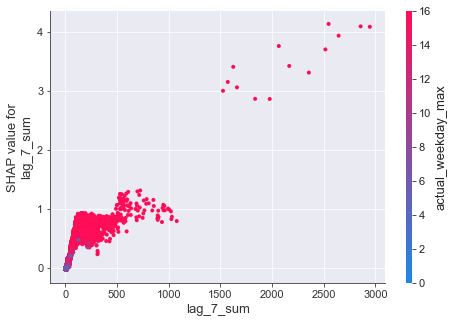

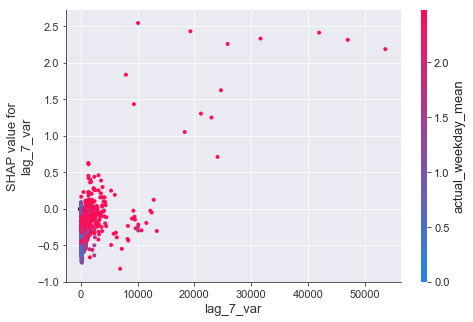

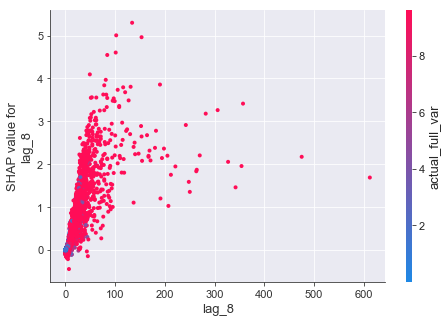

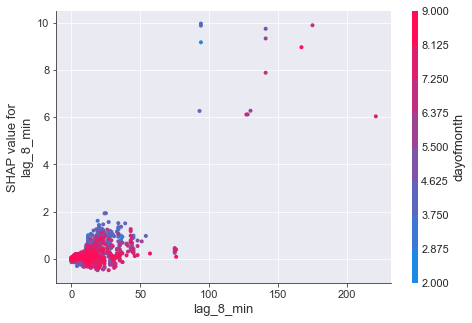

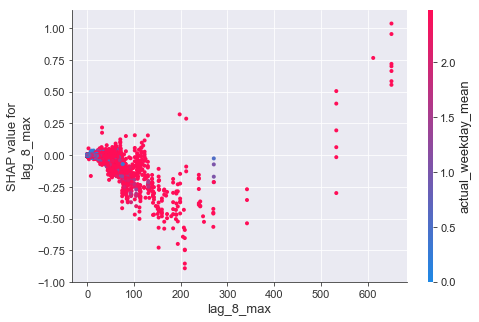

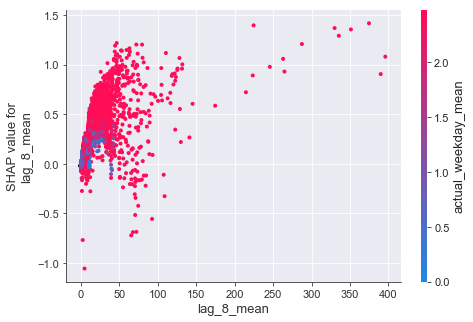

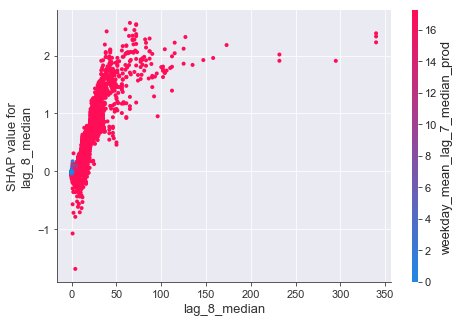

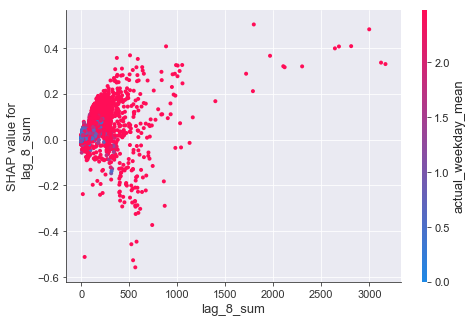

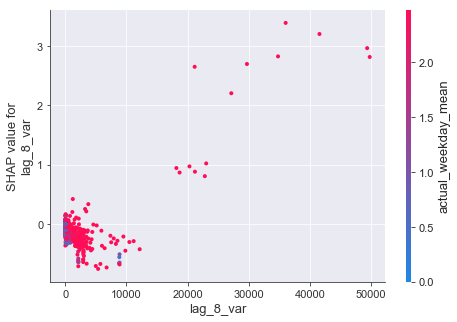

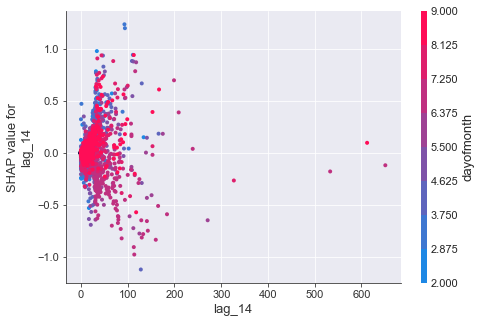

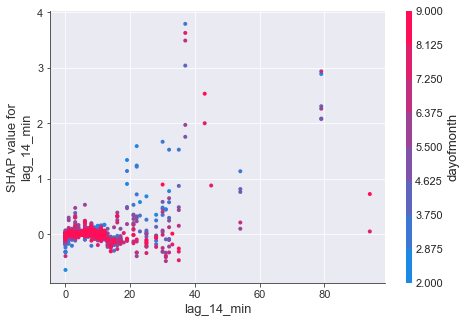

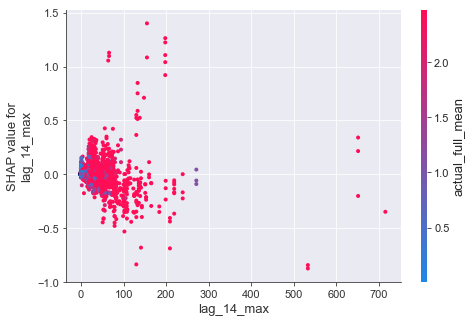

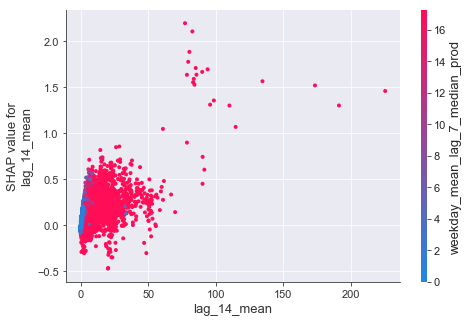

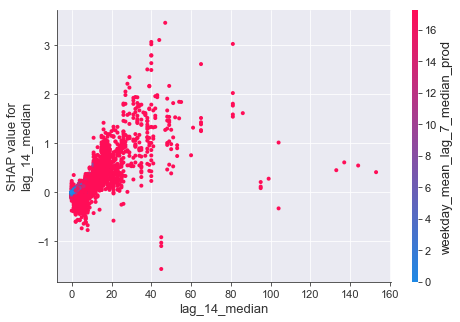

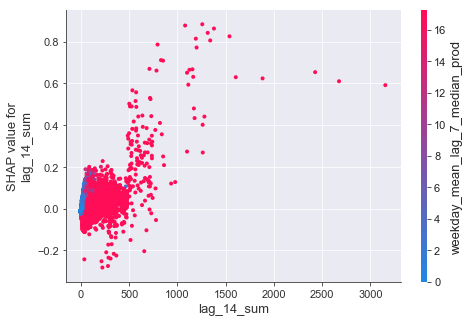

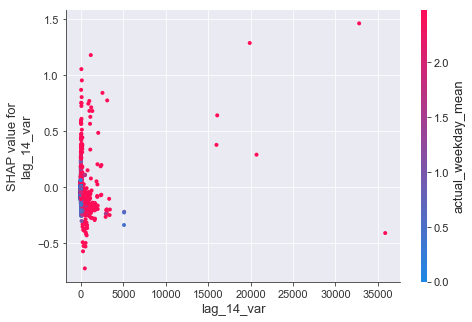

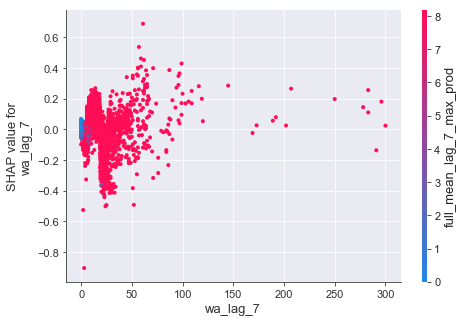

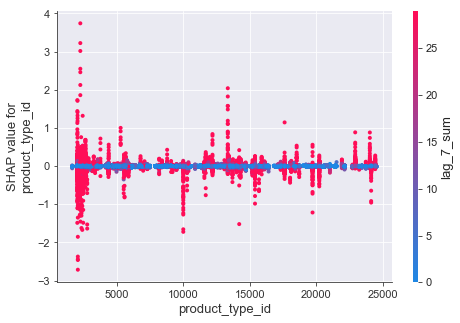

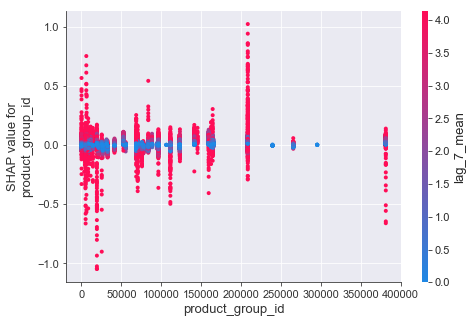

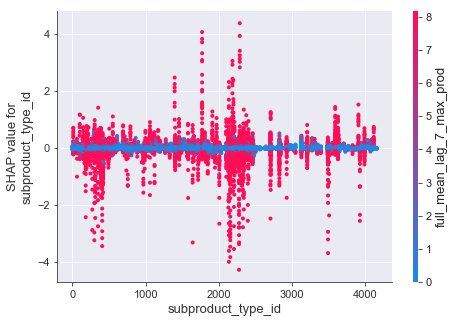

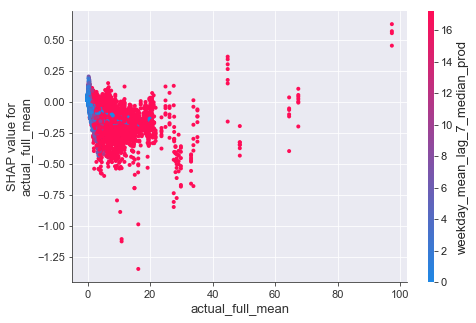

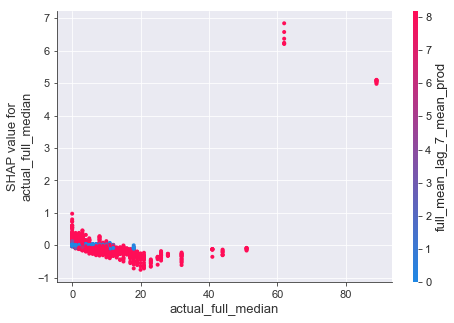

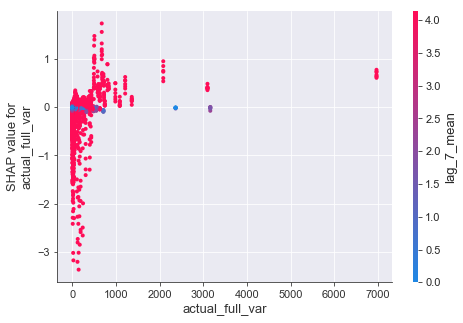

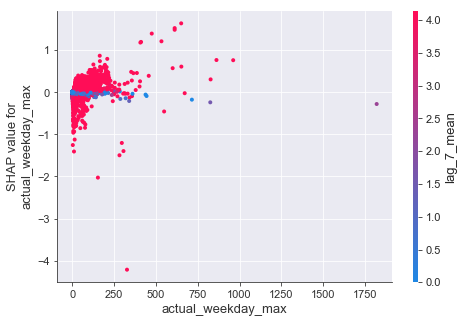

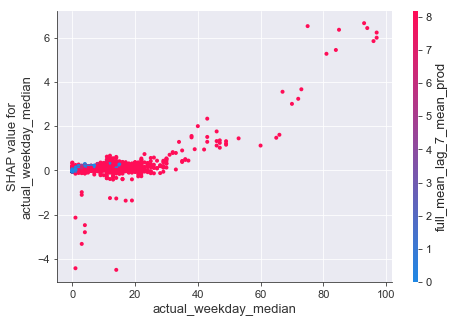

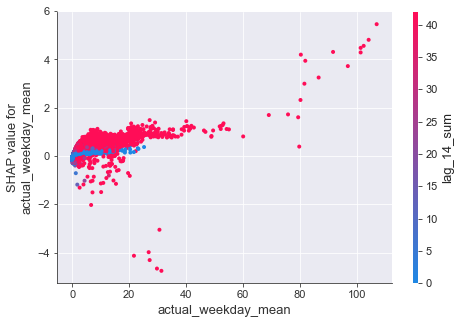

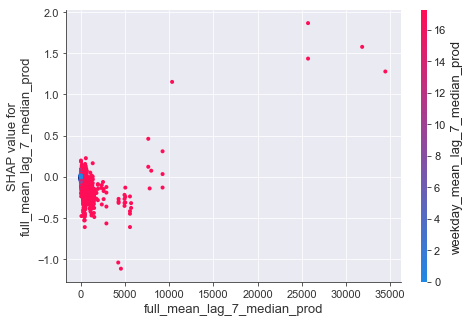

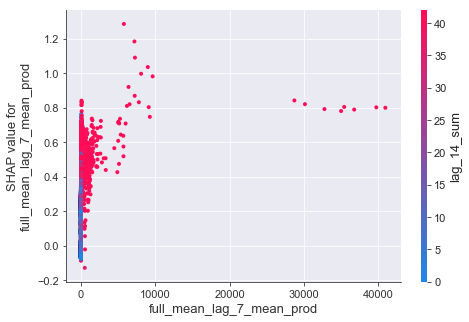

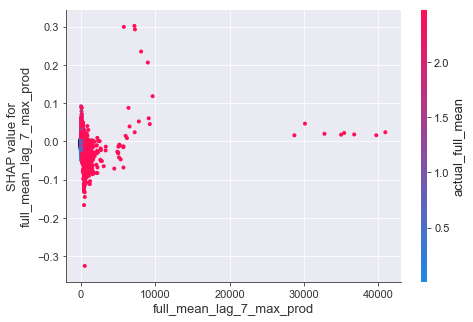

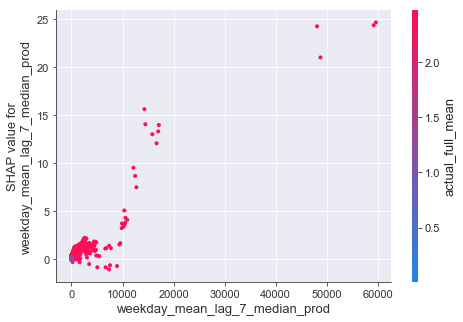

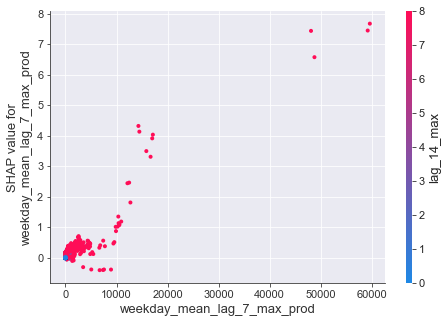

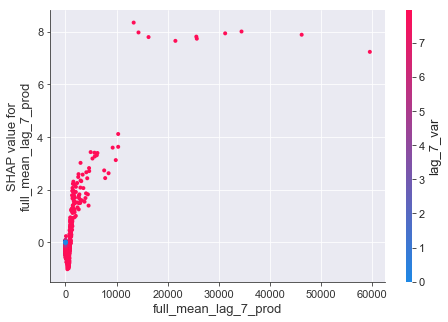

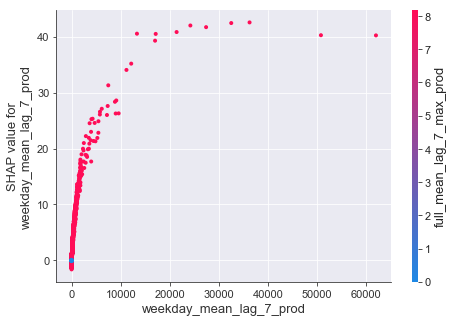

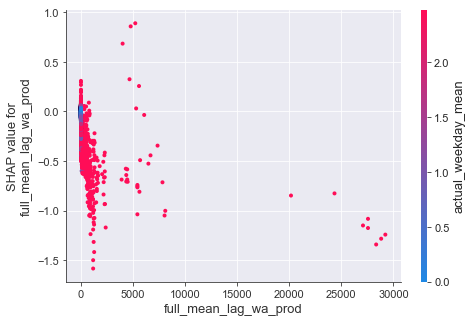

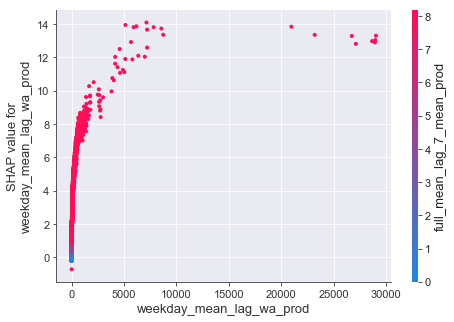

In [27]:
for feature in test_df[features_names].columns:
    shap.dependence_plot(feature, shap_values, test_df[features_names])